## Programming Assignment 3 Part 2 - KMeans Clustering

### 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from kneed import KneeLocator
import math
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures,StandardScaler
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN,AgglomerativeClustering,KMeans
from sklearn.metrics import pairwise_distances
import plotly.express as px

### 2. Reading and Pre-processing the Data

#### 2.1. Reading Data

In [2]:
data = pd.read_csv("Frogs_MFCCs.csv")

In [3]:
data.head()

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  RecordID  
0  0.118680  0.014038  Leptodactylidae  Adenomera  AdenomeraAndre         1  
1  0.082263  0.029056  Leptodactylidae  Adenomera  AdenomeraAndre         1  
2  0.099108  0.077162  Leptodactylidae  Adenomera  AdenomeraAndre         1  
3 -0.018691  0.023954  Leptodactylidae  Adenomera  AdenomeraAndre         1  
4  0.108610  0.079244  Leptodactylidae  Adenomera  AdenomeraAndre         1  

[5 rows x 26 columns]

In [4]:
data.describe()

MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008     0.127099  ...   
min      -0.410417    -0.538982    -0.576506    -0.587313    -0.952266  ...   
25%       0.012581    -0.125737    -0.063109     0.004648    -0.001132  ...   
50%       0.072079    -0.052630     0.013265     0.189317     0.063478  ...   
75%       0.175957     0.085580     0.075108     0.265395     0.117725  ...   
max       0.964240     1.000000     0.551762     0.738033     0.522768  ...   

          MFCCs_14     MFCCs_15     MFCCs_16     MFCCs_17     MFCCs_18  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean     -0.039244    -0.101748     0.042062     0.088680     0.007755   
std       0.152515     0.187618     0.119915     0.138055     0.084733   
min      -0.590380    -0.717156    -0.498675    -0.421480    -0.759322   
25%      -0.132980    -0.255929    -0.019549    -0.001764    -0.042122   
50%      -0.050715    -0.143259     0.041081     0.112769     0.011820   
75%       0.039157     0.017348     0.107046     0.201932     0.061889   
max       0.575749     0.668924     0.670700     0.681157     0.614064   

          MFCCs_19     MFCCs_20     MFCCs_21     MFCCs_22     RecordID  
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  
mean     -0.049474    -0.053244     0.037313     0.087567    25.220014  
std       0.082546     0.094181     0.079470     0.123442    13.214399  
min      -0.680745    -0.361649    -0.430812    -0.379304     1.000000  
25%      -0.106079    -0.120971    -0.017620     0.000533    15.000000  
50%      -0.052626    -0.055180     0.031274     0.105373    22.000000  
75%       0.006321     0.001342     0.089619     0.194819    37.000000  
max       0.574209     0.467831     0.389797     0.432207    60.000000  

[8 rows x 23 columns]

#### 2.2. Finding & Removing Of NULL & Outliers

In [5]:
print("Total Missing Values in each Column : ",data.isnull().sum(),sep="\n")

Total Missing Values in each Column : 
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


#### 2.3. Visualization of Each Feature 

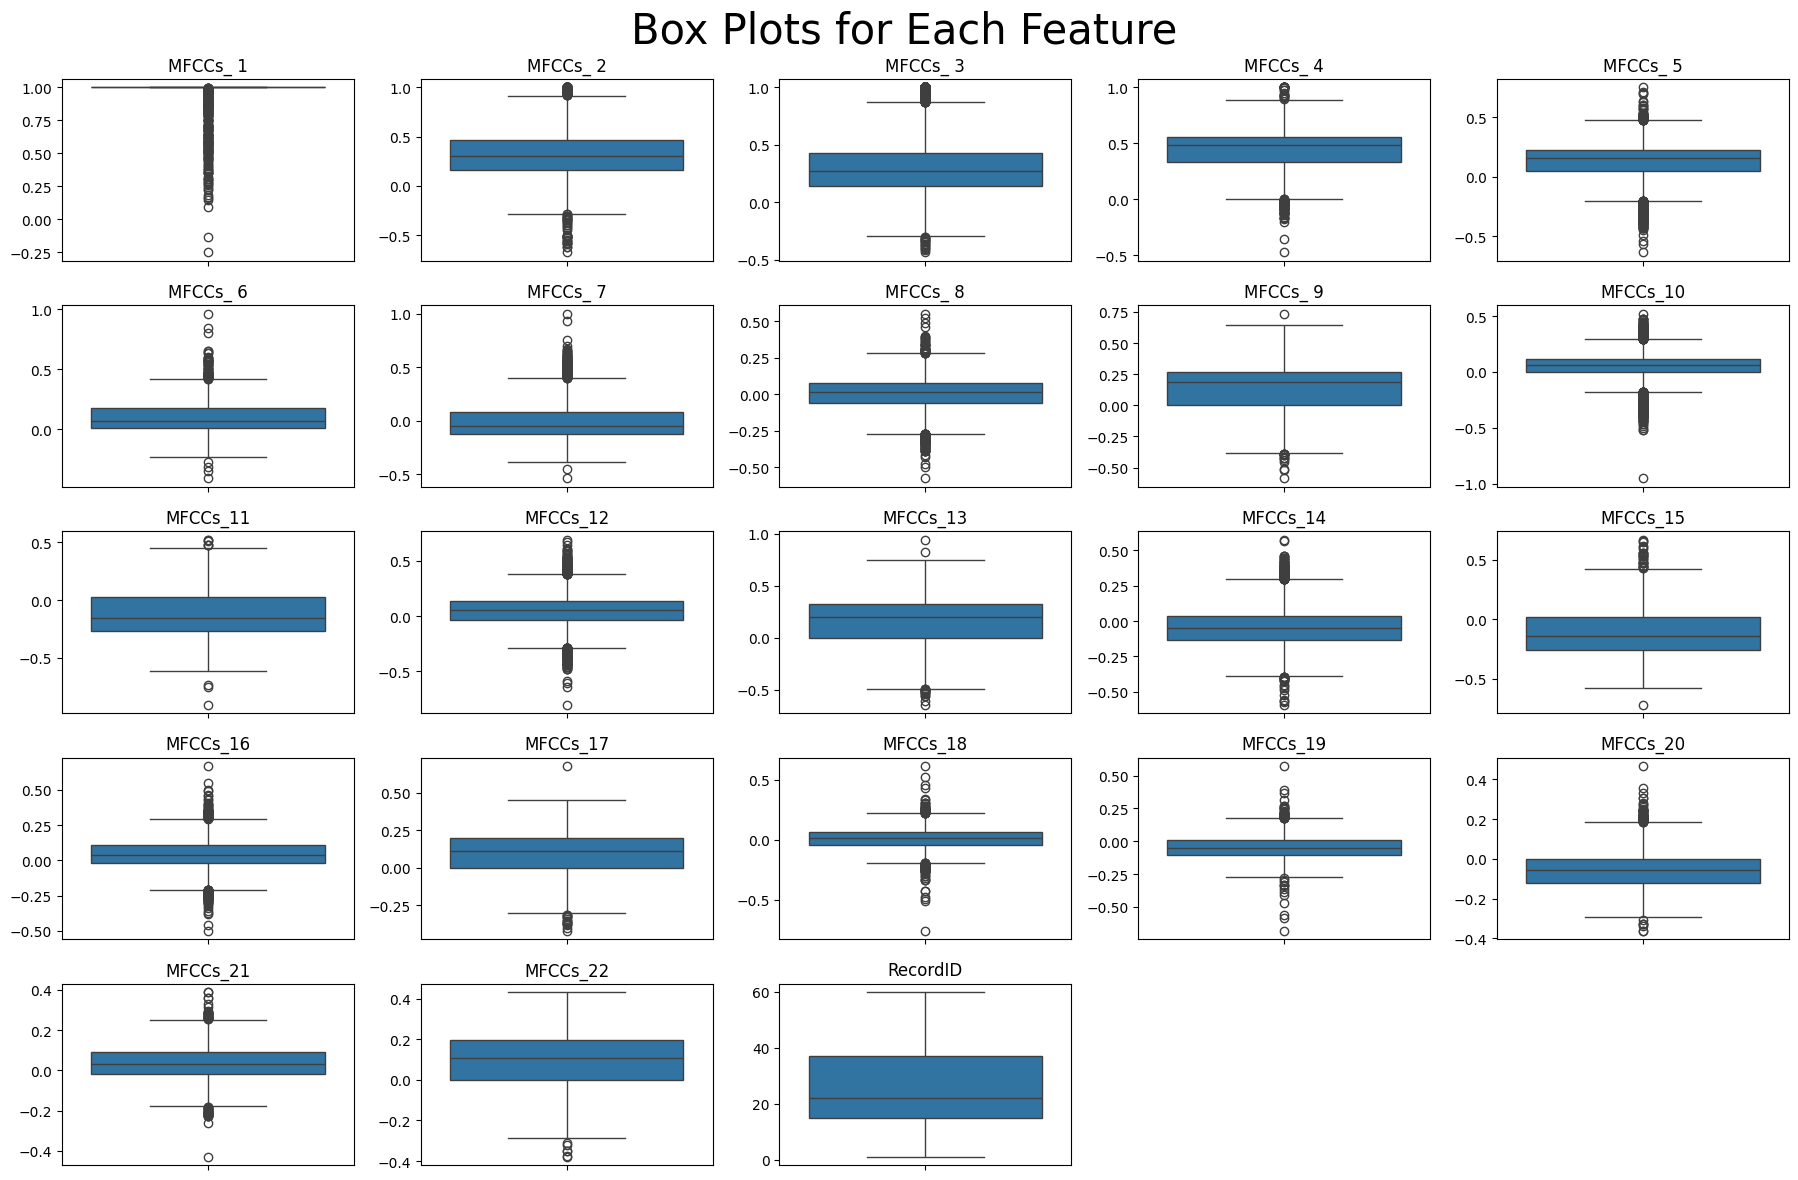

In [6]:
# Set up 5 x 5 grid for 23 features
fig, axes = plt.subplots(5, 5, figsize=(18, 12))  
fig.suptitle('Box Plots for Each Feature', fontsize=30)
axes = axes.flatten() 

# Plot each feature in a separate subplot
for i, col in enumerate(data.select_dtypes(include=['number']).columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any extra empty subplots if there are fewer than 25 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1,1])  # Adjust layout to fit suptitle
plt.show()


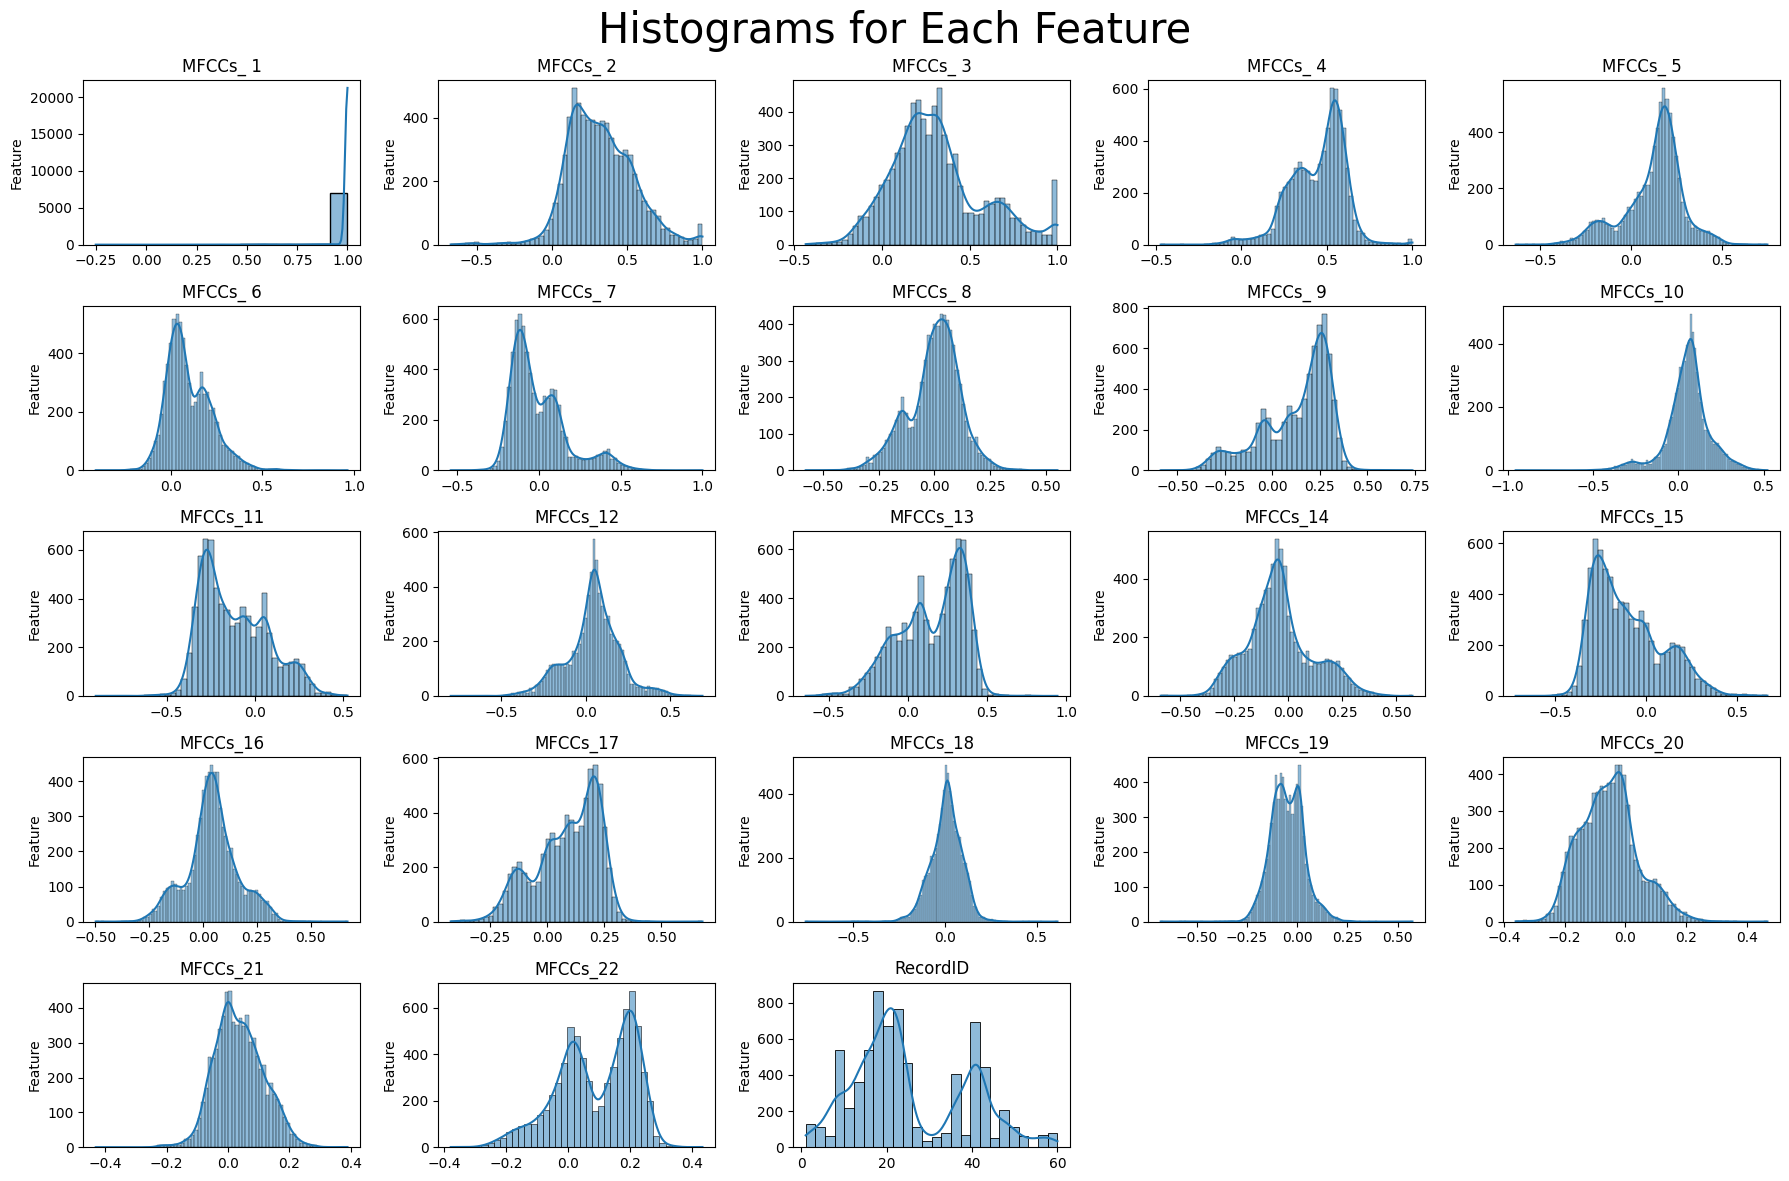

In [7]:
# Set up a 5x5 grid for 23 features
fig, axes = plt.subplots(5, 5, figsize=(18, 12))  
fig.suptitle('Histograms for Each Feature', fontsize=30)
axes = axes.flatten() 

# Plot each feature in a separate subplot
for i, col in enumerate(data.select_dtypes(include=['number']).columns):
    sns.histplot(data[col],kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Feature')

# Remove any extra empty subplots if there are fewer than 25 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1,1])  # Adjust layout to fit suptitle
plt.show()


#### 2.4. Noise Removal

1) Using Quartile Method for the Noise Removal

In [8]:
# Select only the numerical columns in the DataFrame
new_data = data.select_dtypes(include=['number'])

# Calculate the first quartile (Q1) for each numerical feature
Q1 = new_data.quantile(0.25)

# Calculate the third quartile (Q3) for each numerical feature
Q3 = new_data.quantile(0.75)

# Calculate the Interquartile Range (IQR) for each feature
IQR = Q3 - Q1

# Identify rows with outliers using the IQR method
# An outlier is defined as a value below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
outliers = new_data[((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the outliers
print("Outliers based on IQR method:")
print(outliers)


Outliers based on IQR method:
      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
9          1.0  0.120565 -0.107235  0.316555  0.364437  0.307757  0.025992   
12         1.0  0.106109 -0.025790  0.358875  0.297543  0.244335  0.016446   
13         1.0  0.126523 -0.040482  0.341129  0.381446  0.261154 -0.017049   
14         1.0  0.267687  0.099327  0.510454  0.511468  0.317788  0.067992   
15         1.0  0.137623 -0.085808  0.322446  0.344695  0.285642  0.056517   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_1

2) Using Z-score  Method for the Noise Removal

In [9]:
new_data = data.select_dtypes(include=['number'])
scaler = StandardScaler()

columns_to_scale = data.columns[:-4]

# Apply scaling to the data (if it's a NumPy array)
new_data = scaler.fit_transform(new_data)

# Calculate Z-scores for each numerical feature
z_scores = np.abs((new_data - new_data.mean()) / new_data.std())

# Set a Z-score threshold; remove rows with Z-scores above this threshold for any feature
threshold = 2.5
data_cleaned = new_data[(z_scores < threshold).all(axis=1)]

print("Original data shape:", new_data.shape)
print("Cleaned data shape:", data_cleaned.shape)

Original data shape: (7195, 23)
Cleaned data shape: (5891, 23)


In [10]:
data = pd.DataFrame(data_cleaned)

#### 2.5. Encoding Data

In [11]:
# Initialize LabelEncoder
Encoder = LabelEncoder()

# Loop through each column in the DataFrame
for column in data.columns:
    if data[column].dtype == object:
        data[column] = Encoder.fit_transform(data[column])

#### 2.6. Scaling Data

In [12]:
# Initialize the MinMaxScaler to standardize features
scaler = StandardScaler()

columns_to_scale = data.columns[:-4]
# Apply scaling to the data (if it's a NumPy array)
data = scaler.fit_transform(data[columns_to_scale])

#### 2.7. Feature Correlation Analysis

In [13]:
# Finding Co-Relation Matrix
data = pd.DataFrame(data,columns=columns_to_scale)

correl_matrix = data.corr()

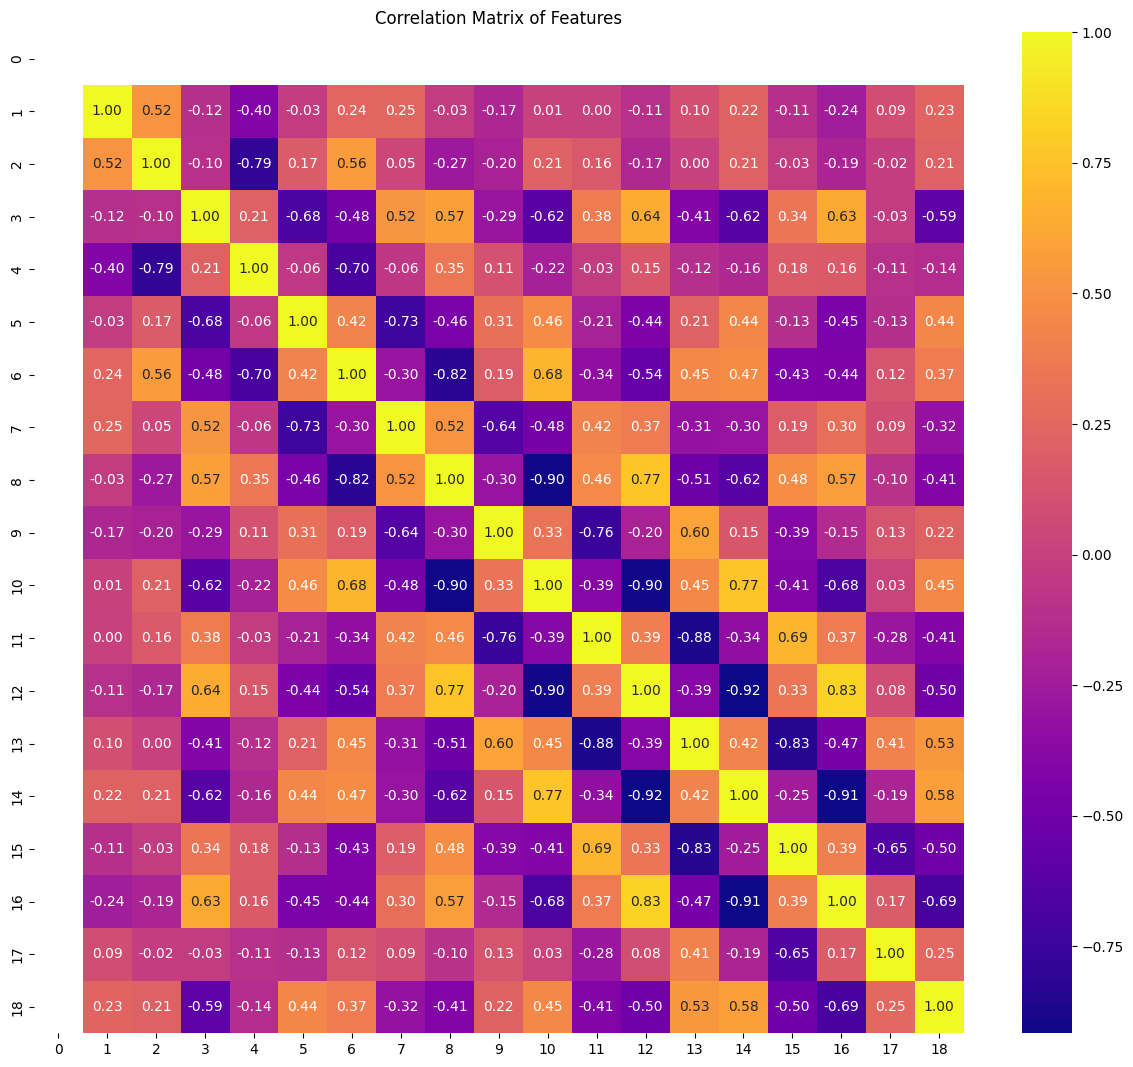

In [14]:
plt.figure(figsize=(15,13))  # Sets the figure size to 12x10 inches for better visibility of the heatmap
sns.heatmap(correl_matrix, annot=True, cmap='plasma', fmt=".2f")  # Creates the heatmap using Seaborn
plt.title('Correlation Matrix of Features')  # Adds a title to the heatmap
plt.show()  # Displays the heatmap plot

#### 2.8. Feature Extraction

In [15]:
PolyExtrac = PolynomialFeatures(degree=3, include_bias=False)
poly_data = pd.DataFrame(PolyExtrac.fit_transform(data))

In [16]:
poly_data.shape

(5891, 1539)

In [17]:
data = pd.concat([data,poly_data],axis=1)

In [ ]:
data.columns = data.columns.astype(str)
pca = PCA(n_components=0.7)  # Keep 70% of variance
data = pca.fit_transform(data)

In [19]:
data.shape

(5891, 8)

#### 2.9. K-Means Clusturing From Scratch

###### Class Overview:
The Kmean class includes methods for:

1) `Initializing` centroids randomly from the data points.
2) `Computing distances` between each data point and the centroids.
3) `Assigning` data points to the nearest cluster.\n
4) `Updating centroids` based on the mean of assigned data points.\n
5) `Fitting` the K-Means model to the data, iterating until centroids converge or reaching a maximum number of iterations.\n
6) `Predicting` cluster assignments for new data points.\n

In [20]:
import numpy as np

class Kmean:
    # Initialization method with parameters for number of clusters, max iterations, and tolerance for convergence
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters  # Number of clusters to form
        self.max_iter = max_iter      # Maximum number of iterations for convergence
        self.tol = tol                # Tolerance for centroid change to determine convergence

    # Method to initialize centroids randomly from the data
    def initialize_centroids(self, data):
        np.random.seed(0)  # Set seed for reproducibility
        random_indices = np.random.permutation(data.shape[0])[:self.n_clusters]
        return data[random_indices]  # Select n_clusters random points as initial centroids

    # Method to compute the Euclidean distance between each data point and each centroid
    def compute_distances(self, data, centroids):
        distances = np.zeros((data.shape[0], self.n_clusters))  # Matrix to store distances
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.linalg.norm(data - centroid, axis=1)  # Distance to each centroid
        return distances

    # Method to assign each data point to the closest centroid
    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1)  # Find index of closest centroid for each point

    # Method to update centroids by calculating the mean of all points assigned to each cluster
    def update_centroids(self, data, labels):
        centroids = np.zeros((self.n_clusters, data.shape[1]))  # Initialize new centroids
        for i in range(self.n_clusters):
            points_in_cluster = data[labels == i]  # Select points in the current cluster
            if points_in_cluster.size > 0:         # Check if the cluster is not empty
                centroids[i] = points_in_cluster.mean(axis=0)  # Update centroid to mean of points
        return centroids

    # Method to fit the K-Means model to the data
    def fit(self, data):
        centroids = self.initialize_centroids(data)  # Step 1: Initialize centroids
        for i in range(self.max_iter):  # Step 2: Iterate to find optimal centroids
            old_centroids = centroids.copy()  # Store old centroids for convergence check
            distances = self.compute_distances(data, centroids)  # Step 3: Compute distances
            labels = self.assign_clusters(distances)  # Step 4: Assign clusters
            centroids = self.update_centroids(data, labels)  # Step 5: Update centroids
            # Check for convergence: stop if centroids move less than tolerance
            if np.linalg.norm(centroids - old_centroids) < self.tol:
                break
        self.centroids = centroids  # Final centroids
        self.labels = labels        # Cluster labels for each point
        return self

    # Method to predict cluster labels for new data points
    def predict(self, data):
        distances = self.compute_distances(data, self.centroids)  # Compute distances to centroids
        return self.assign_clusters(distances)  # Assign clusters based on closest centroid


#### 2.10. Elbow Method for Best number of clusters

In [21]:
data_val = data  # Elbow Method: Calculate WCSS for different cluster numbers
wcss = []
cluster_range = range(1, 11)

# Elbow Method to calculate WCSS
for n_clusters in cluster_range:
    kmeans = Kmean(n_clusters=n_clusters)  # Instantiate Kmean class
    kmeans.fit(data_val)  # Fit the model to the data
    distances = kmeans.compute_distances(data_val, kmeans.centroids)  # Compute distances
    wcss.append(np.sum(np.min(distances, axis=1) ** 2))  # Calculate WCSS

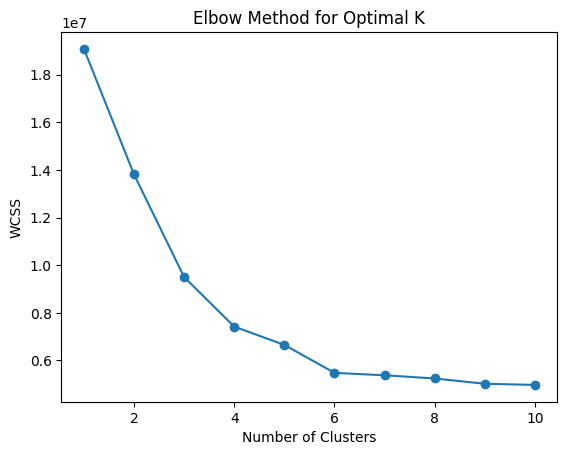

In [22]:
# Plot Elbow Method graph
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


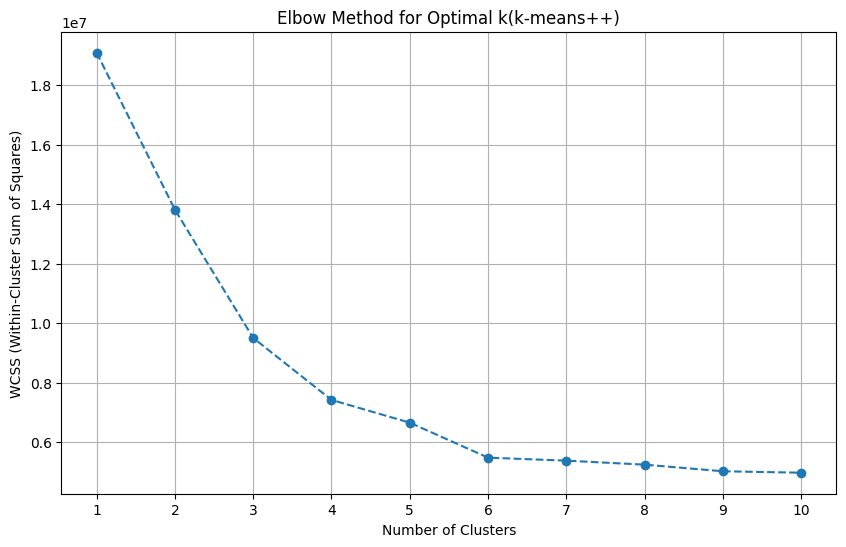

Optimal number of clusters from Elbow Method: 4


In [23]:
wcss1 = []
cluster_range = range(1, 11)

# Elbow Method to calculate WCSS
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)  # Standard KMeans
    kmeans.fit(data_val)  # Fit the model to the data
    wcss1.append(kmeans.inertia_)  # Append the WCSS (inertia)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k(k-means++)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Assuming `wcss` contains WCSS values for each cluster count
kneedle = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_clusters = kneedle.elbow
print("Optimal number of clusters from Elbow Method:", optimal_clusters)


#### 2.11. Number of Optimal Clusters

In [24]:
# Assuming `wcss` contains WCSS values for each cluster count
kneedle = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_clusters = kneedle.elbow
print("Optimal number of clusters from Elbow Method:", optimal_clusters)

Optimal number of clusters from Elbow Method: 4


#### 2.12. Silhouette Score

`Silhouette Score` : It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher score indicates better-defined clusters.

In [25]:
kmeanModel = KMeans(n_clusters=optimal_clusters,init='random',random_state=42)
kmeanModel.fit(data_val)
Score = silhouette_score(data_val, kmeanModel.labels_)
print(f"Silhouette score for Random: {Score}")

Silhouette score for Random: 0.7176380454984954


#### 2.13. Diffrent Initializations

In [26]:
kmeanModel1 = KMeans(n_clusters=optimal_clusters,init='k-means++',random_state=42)
kmeanModel1.fit(data_val)
Kmeanspp_score = silhouette_score(data_val, kmeanModel1.labels_)
print(f"Silhouette score for K-Means++ : {Kmeanspp_score}")

Silhouette score for K-Means++ : 0.6086672800538672


In [27]:
if(Score>Kmeanspp_score):
    print("Random Initialization Better than K-Means++ Initialization For this Data Set")
else:
    print("K-Means++ Initialization Better than Random Initialization For this Data Set")

Random Initialization Better than K-Means++ Initialization For this Data Set


### 3. Cluster Visualization

#### 3.1. Dimensionality Reduction:
Apply PCA

In [28]:
# Initialize and fit the KMeans model with 'k-means++' initialization
kmeans_model = KMeans(n_clusters=optimal_clusters, init='random', random_state=42)
kmeans_model.fit(data_val)

# Retrieve cluster labels
cluster_labels = kmeans_model.labels_

# Perform PCA for 3D visualization
pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data_val)

# Perform PCA for 3D visualization
pca = PCA(n_components=2)
data_pca_2d = pca.fit_transform(data_val)

#### 3.2. Cluster Plots:

In [29]:

pca_df = pd.DataFrame(data_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_labels  # Add cluster labels to the DataFrame

fig = px.scatter_3d(
    pca_df, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    color='Cluster', 
    title="Interactive 3D PCA Representation of Clusters",
    labels={'Cluster': 'Cluster'},
    hover_data={'PC1': True, 'PC2': True, 'PC3': True},
    width=1000, 
    height=800   
)

# Show the plot
fig.show()


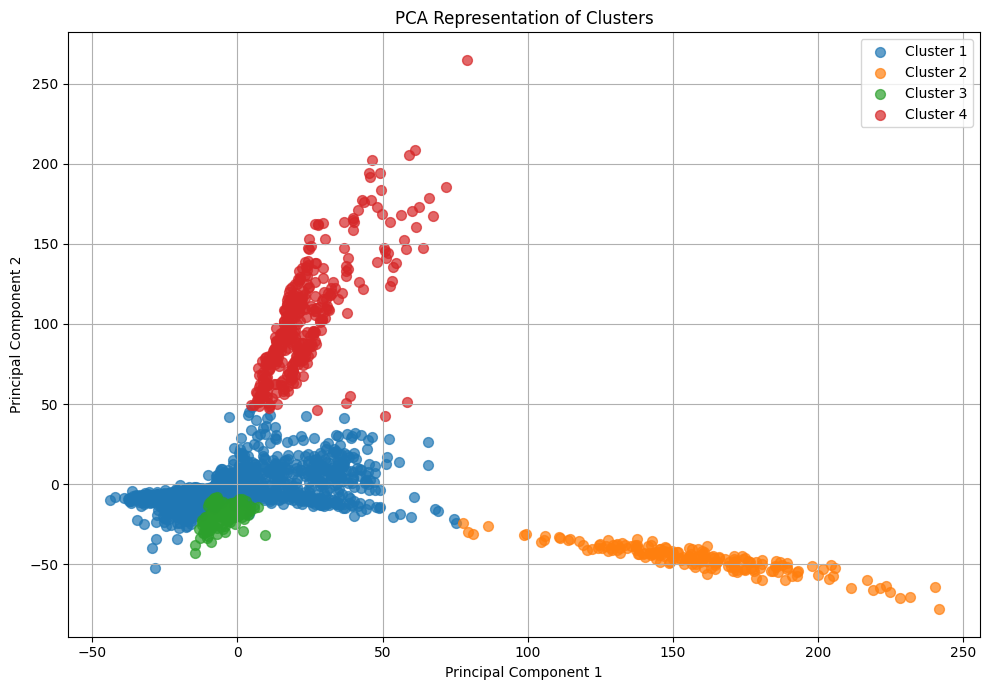

In [30]:
plt.figure(figsize=(10, 7))
plt.title("PCA Representation of Clusters")
for cluster in range(optimal_clusters):
    plt.scatter(data_pca_2d[cluster_labels == cluster, 0], data_pca_2d[cluster_labels == cluster, 1], 
                label=f'Cluster {cluster + 1}', s=50, alpha=0.7)

# Add labels and legend
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()  # Optional: add grid for better visualization
plt.tight_layout()  # Optional: adjusts subplot params for a neat layout
plt.show()

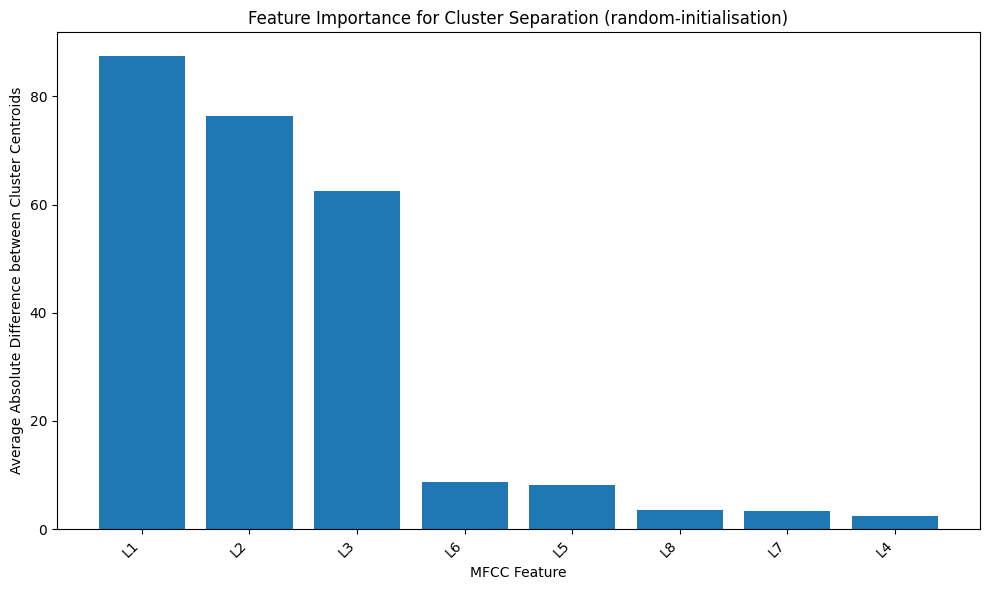

In [31]:

cluster_centroids = [np.mean(data_val[cluster_labels == i], axis=0) for i in range(optimal_clusters)]

centroid_differences = []
for i in range(optimal_clusters):
  for j in range(i + 1, optimal_clusters):
    centroid_differences.append(np.abs(cluster_centroids[i] - cluster_centroids[j]))

average_differences = np.mean(centroid_differences, axis=0)

feature_importance = [(i, average_differences[i]) for i in range(len(average_differences))]
feature_importance.sort(key=lambda x: x[1], reverse=True)

top_n_features = 22
plt.figure(figsize=(10, 6))
plt.bar([f"L{i+1}" for i, _ in feature_importance[:top_n_features]],
        [diff for _, diff in feature_importance[:top_n_features]])
plt.xlabel("MFCC Feature")
plt.ylabel("Average Absolute Difference between Cluster Centroids")
plt.title("Feature Importance for Cluster Separation (random-initialisation)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Cluster Evaluation Metrics 

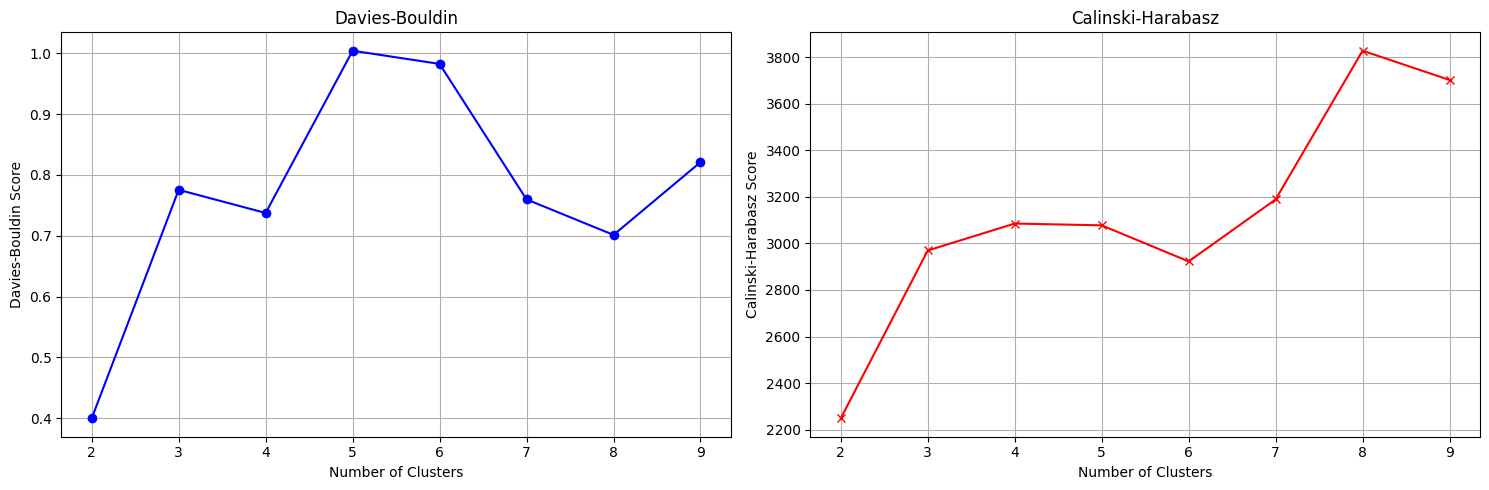

Davies-Bouldin Index: [np.float64(0.39947972546954985), np.float64(0.7755944350872087), np.float64(0.7374785331491513), np.float64(1.0045501994593442), np.float64(0.9828038078998836), np.float64(0.7597560435210882), np.float64(0.7013725525405523), np.float64(0.8211392009282411)]
Calinski-Harabasz Index: [np.float64(2248.8101720117797), np.float64(2969.5782604746823), np.float64(3085.265236174958), np.float64(3077.5874943476933), np.float64(2922.69510764561), np.float64(3188.7363424067553), np.float64(3827.4268943320712), np.float64(3701.8381036547207)]


In [32]:
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(data_val)
    labels = kmeans.labels_

    davies_bouldin_scores.append(davies_bouldin_score(data_val, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(data_val, labels))

fig, (DBG, CHG) = plt.subplots(1, 2, figsize=(15, 5))

DBG.plot(range(2, 10), davies_bouldin_scores, marker='o', color='b')
DBG.set_title('Davies-Bouldin')
DBG.set_xlabel('Number of Clusters')
DBG.set_ylabel('Davies-Bouldin Score')
DBG.grid(True)

CHG.plot(range(2, 10), calinski_harabasz_scores, marker='x', color='r')
CHG.set_title('Calinski-Harabasz')
CHG.set_xlabel('Number of Clusters')
CHG.set_ylabel('Calinski-Harabasz Score')
CHG.grid(True)

plt.tight_layout()
plt.show()

print("Davies-Bouldin Index:", davies_bouldin_scores)
print("Calinski-Harabasz Index:", calinski_harabasz_scores)

### 5. Comparison with Other Clustering Algorithms

#### 5.1. DBSCAN

In [33]:
# Parameters
min_samples = 5
eps_values = np.linspace(0.1, 1.5, 15)
sum_of_squares = []
num_clusters = []
best_silhouette = -1
best_eps = None
dbscan_labels = None

# DBSCAN clustering and SSD calculation
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_val)

    unique_labels = set(labels)
    num_clusters_current = len([label for label in unique_labels if label != -1])  # Exclude noise points
    num_clusters.append(num_clusters_current)

    ssd = 0
    for label in unique_labels:
        if label != -1:
            cluster_points = data_val[labels == label]
            cluster_center = np.mean(cluster_points, axis=0)
            ssd += np.sum((cluster_points - cluster_center) ** 2)  # SSD for each cluster

    if num_clusters_current > 1:  # at least 2 clusters to calculate silhouette
        score = silhouette_score(data_val[labels != -1], labels[labels != -1])
        if score > best_silhouette:
            best_silhouette = score
            best_eps = eps
            dbscan_labels = labels

    sum_of_squares.append(ssd)

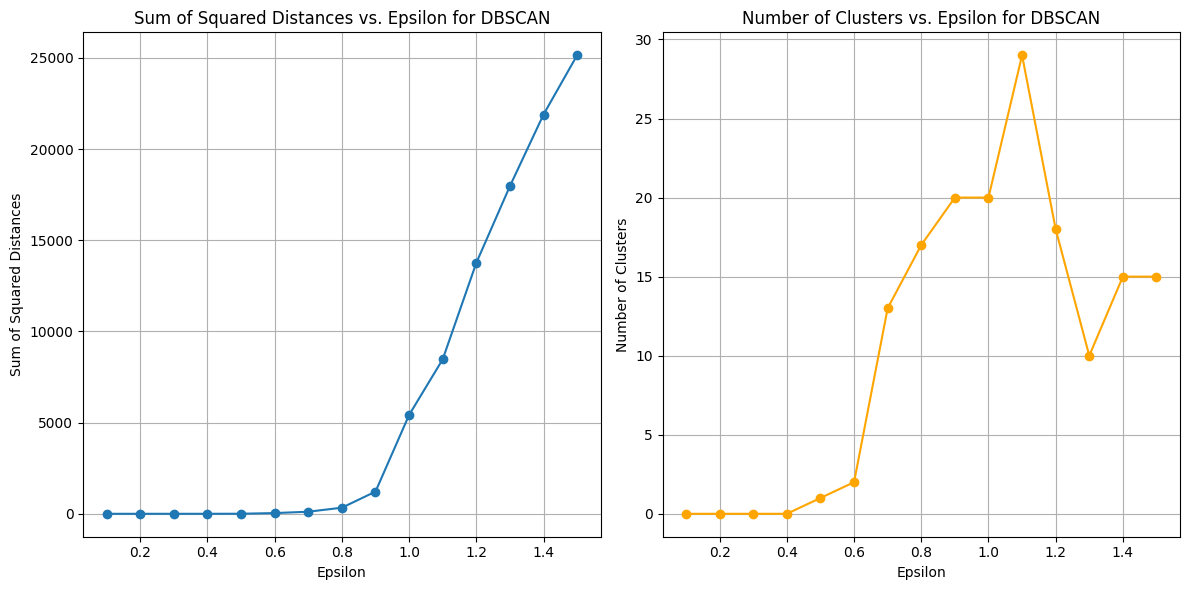

Optimal eps based on silhouette score: 0.6, with silhouette score: 0.9559224783745093


In [34]:
# Plotting SSD and Number of Clusters vs. Epsilon
plt.figure(figsize=(12, 6))

# Sum of Squared Distances plot
plt.subplot(1, 2, 1)
plt.plot(eps_values, sum_of_squares, marker='o')
plt.title('Sum of Squared Distances vs. Epsilon for DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)

# Number of Clusters plot
plt.subplot(1, 2, 2)
plt.plot(eps_values, num_clusters, marker='o', color='orange')
plt.title('Number of Clusters vs. Epsilon for DBSCAN')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Optimal eps based on silhouette score: {best_eps}, with silhouette score: {best_silhouette}")

#### 5.2. AgglomerativeClustering

In [35]:
# Initialize error values list and range of possible clusters
err_values = []
num_clusters = range(1, 10)

# Calculate WCSS for each number of clusters
for n_clusters in num_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(data_val)

    err_val = 0
    cluster_centers = [np.mean(data_val[labels == i], axis=0) for i in range(n_clusters)]
    for k in range(n_clusters):
        cluster_points = data_val[labels == k]
        for point in cluster_points:
            err_val += np.linalg.norm(point - cluster_centers[k]) ** 2  # Use correct index `k`

    err_values.append(err_val)

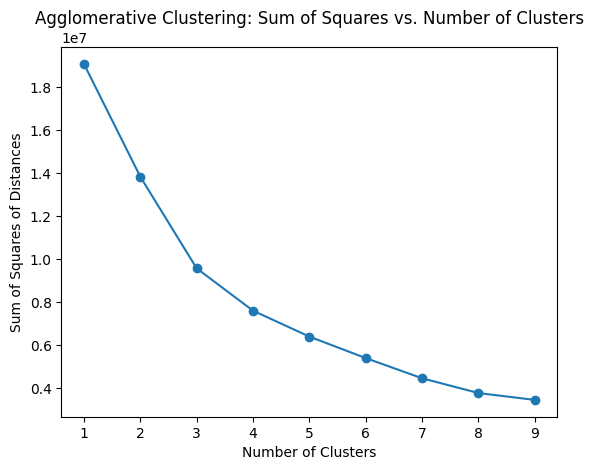

In [36]:
# Plot the Elbow Method graph
plt.plot(num_clusters, err_values, marker='o')
plt.title('Agglomerative Clustering: Sum of Squares vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares of Distances')
plt.show()

In [37]:
kneedle = KneeLocator(range(1, 10), err_values, curve="convex", direction="decreasing")
optimal = kneedle.elbow
print(f"Optimal number of clusters: {optimal}")

Optimal number of clusters: 4


In [38]:
agg_clustering = AgglomerativeClustering(n_clusters=optimal, linkage='ward')
agg_labels = agg_clustering.fit_predict(data_val)

silhouette_agg = silhouette_score(data_val, agg_labels)
print(f"Silhouette score for Agglomerative Clustering: {silhouette_agg}")

pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_val)

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(data_val)

Silhouette score for Agglomerative Clustering: 0.6801959845351576


In [39]:
Agg_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
Agg_pca['Cluster'] = agg_labels  # Add cluster labels to the DataFrame


# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    Agg_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title="Interactive 3D PCA Representation of Agglomerative Clustering",
    labels={'Cluster': 'Cluster'},
    hover_data={'PC1': True, 'PC2': True, 'PC3': True},
    width=1000,
    height=800
)

# Show the plot
fig.show()

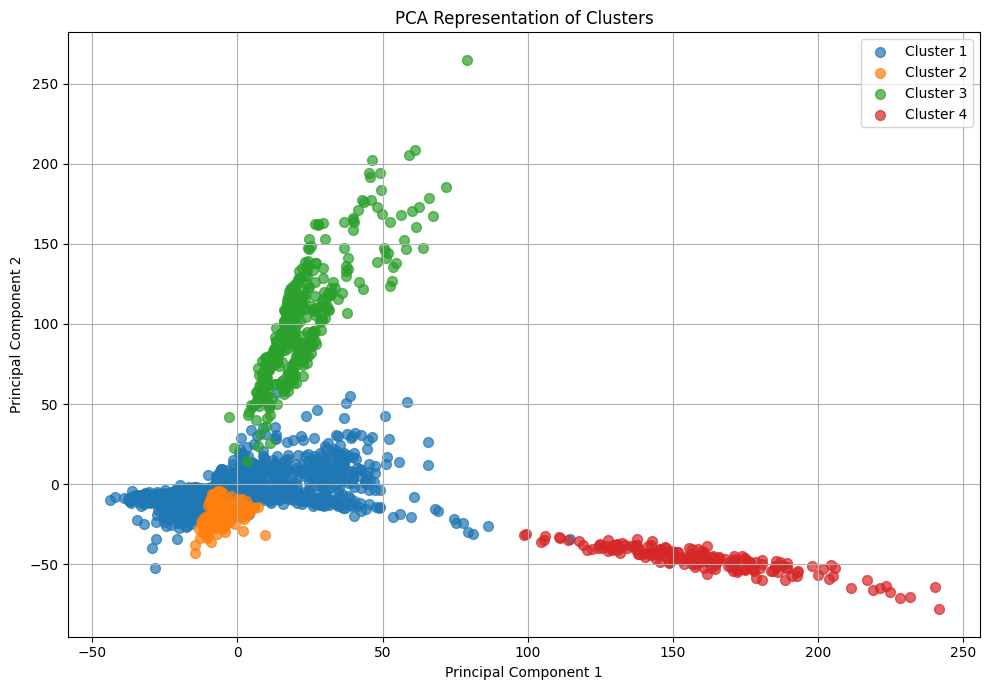

In [40]:
plt.figure(figsize=(10, 7))
plt.title("PCA Representation of Clusters")
for cluster in range(optimal):
    plt.scatter(X_pca_2d[agg_labels == cluster, 0], X_pca_2d[agg_labels == cluster, 1],label=f'Cluster {cluster + 1}', s=50, alpha=0.7)

# Add labels and legend
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()  # Optional: add grid for better visualization
plt.tight_layout()  # Optional: adjusts subplot params for a neat layout
plt.show()